In [15]:
import pandas as pd
df_dechets = pd.read_csv("https://raw.githubusercontent.com/murpi/supdevinci/refs/heads/main/ML/tri_selectif.csv")
df_dechets.head()

,product,metal,width,optical_code,height_40,height_70,height_110,height_200,timestamp_first,timestamp_last
0,dechet,False,86,T033073,True,True,False,False,2024-11-14 14:40:59.955602,2024-11-14 14:40:59.994822
1,dechet,False,79,T047103,True,True,False,False,2024-11-14 14:41:00.075113,2024-11-14 14:41:00.103905
2,carton_petit,False,89,B121025,True,True,False,False,2024-11-14 14:41:00.226855,2024-11-14 14:41:00.277602
3,tetrapak,False,71,B103004,True,False,False,False,2024-11-14 14:41:00.375405,2024-11-14 14:41:00.412324
4,bouteille_t,False,203,T049064,True,False,False,False,2024-11-14 14:41:00.475034,2024-11-14 14:41:00.497214


In [16]:
df_dechets.shape

(10000, 10)

In [17]:
df_dechets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product          10000 non-null  object
 1   metal            10000 non-null  bool  
 2   width            10000 non-null  int64 
 3   optical_code     10000 non-null  object
 4   height_40        10000 non-null  bool  
 5   height_70        10000 non-null  bool  
 6   height_110       10000 non-null  bool  
 7   height_200       10000 non-null  bool  
 8   timestamp_first  10000 non-null  object
 9   timestamp_last   10000 non-null  object
dtypes: bool(5), int64(1), object(4)
memory usage: 439.6+ KB


In [18]:
df_dechets.isna().sum()

,0
product,0
metal,0
width,0
optical_code,0
height_40,0
height_70,0
height_110,0
height_200,0
timestamp_first,0
timestamp_last,0


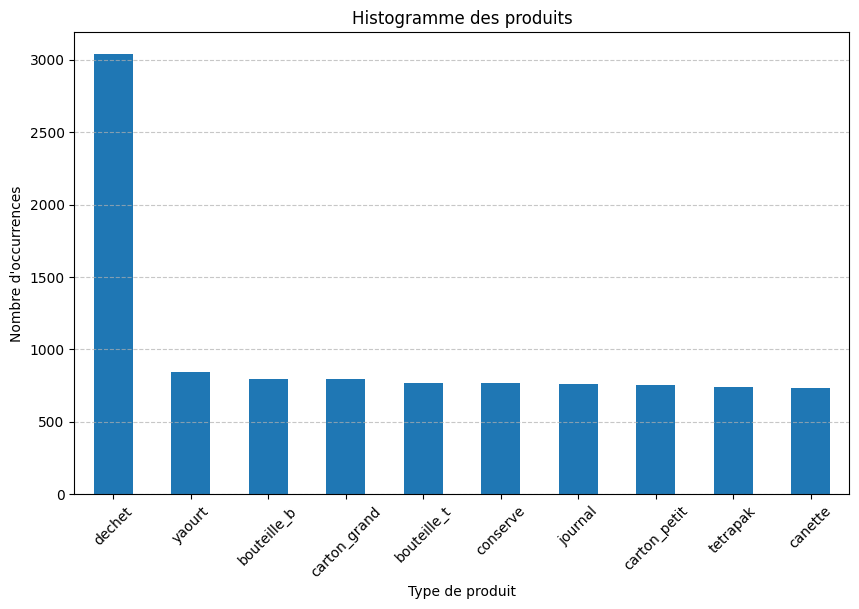

In [23]:
import matplotlib.pyplot as plt
product_counts = df_dechets['product'].value_counts()

# Créer un histogramme
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Histogramme des produits')
plt.xlabel('Type de produit')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [24]:
df_dechets['height_110']


,height_110
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [52]:
def determine_height(row):
    if not row['height_40'] and not row['height_70'] and not row['height_110'] and not row['height_200']:
        return '[0, 40]'
    if row['height_40'] and not row['height_70'] and not row['height_110'] and not row['height_200']:
        return '[40, 70]'
    elif row['height_40'] and row['height_70'] and not row['height_110'] and not row['height_200']:
        return '[70, 110]'
    elif  row['height_40'] and row['height_70'] and row['height_110'] and not row['height_200']:
        return '[110, 200]'
    elif row['height_40'] and row['height_70'] and row['height_110'] and row['height_200']:
         return '>= 200'
    else:
        return 'Undefined'


In [53]:
# Appliquer la fonction pour créer la colonne 'height'
df_dechets['height'] = df_dechets.apply(determine_height, axis=1)

# Afficher le DataFrame mis à jour
print(df_dechets['height'])

0       [70, 110]
1       [70, 110]
2       [70, 110]
3        [40, 70]
4        [40, 70]
          ...    
9995    [70, 110]
9996     [40, 70]
9997      [0, 40]
9998     [40, 70]
9999      [0, 40]
Name: height, Length: 10000, dtype: object


In [54]:
undefined_height = df_dechets[df_dechets['height'] == 'Undefined']
undefined_height.shape

(0, 11)

In [56]:
height_encoder = {
    '[0, 40]': 1,
    '[40, 70]': 2,
    '[70, 110]': 3,
    '[110, 200]': 4,
    '>= 200': 5
}

# Encoder la colonne 'height'
df_dechets['height_encoded'] = df_dechets['height'].map(height_encoder)

# Afficher les premières lignes pour vérifier
print(df_dechets[['height', 'height_encoded']])


         height  height_encoded
0     [70, 110]               3
1     [70, 110]               3
2     [70, 110]               3
3      [40, 70]               2
4      [40, 70]               2
...         ...             ...
9995  [70, 110]               3
9996   [40, 70]               2
9997    [0, 40]               1
9998   [40, 70]               2
9999    [0, 40]               1

[10000 rows x 2 columns]
